<a href="https://colab.research.google.com/github/abhirukth/Data-Sci.-File/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imporing Libraries

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Loading Data

In [ ]:
data = pd.read_csv('/content/Iris.csv')

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

> Data is already clean with no NULL values.

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Model Training

In [ ]:
X = data.drop(['Id', 'Species'], axis = 1)
y = data['Species']

In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
encoder = LabelEncoder()
y = pd.DataFrame(encoder.fit_transform(y))

encoded_iris_types = {index : label for index, label in enumerate(encoder.classes_)}
encoded_iris_types

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [ ]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 40)

## Implementing neural networks

In [ ]:
inputs = tf.keras.Input(shape = (4, ))
x = tf.keras.layers.Dense(256, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 40

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/40
3/3 [==============================] - 1s 84ms/step - loss: 1.0340 - accuracy: 0.3571 - val_loss: 0.9340 - val_accuracy: 0.5714
Epoch 2/40
3/3 [==============================] - 0s 14ms/step - loss: 0.8421 - accuracy: 0.6905 - val_loss: 0.7859 - val_accuracy: 0.5714
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 0.7351 - accuracy: 0.7024 - val_loss: 0.7121 - val_accuracy: 0.5714
Epoch 4/40
3/3 [==============================] - 0s 14ms/step - loss: 0.6484 - accuracy: 0.7262 - val_loss: 0.5974 - val_accuracy: 0.8095
Epoch 5/40
3/3 [==============================] - 0s 15ms/step - loss: 0.5682 - accuracy: 0.7381 - val_loss: 0.5616 - val_accuracy: 0.5714
Epoch 6/40
3/3 [==============================] - 0s 15ms/step - loss: 0.5003 - accuracy: 0.7500 - val_loss: 0.4766 - val_accuracy: 0.9524
Epoch 7/40
3/3 [==============================] - 0s 13ms/step - loss: 0.4569 - accuracy: 0.9643 - val_loss: 0.4388 - val_accuracy: 0.9524
Epoch 8/40
3/3 [===========

# Graph comparing training and validation loss

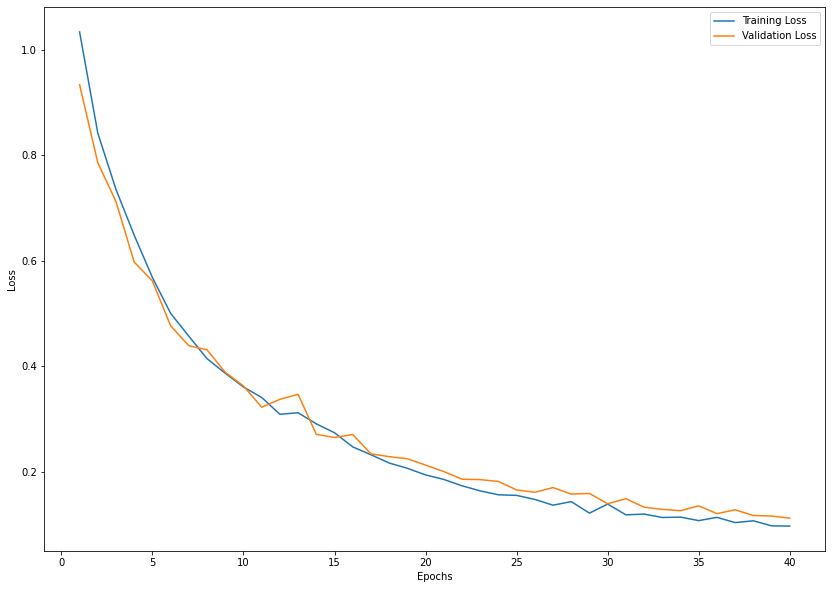

In [ ]:
plt.figure(figsize = (14, 10))

epoch_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epoch_range, train_loss, label = "Training Loss")
plt.plot(epoch_range, val_loss, label = "Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Score

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 1.0000


[0.09715938568115234, 1.0]

### A model with an accuracy of 100%